

# <center>  Regresión Logística </center>

## Descripción
Esta sección analiza la Regresión Logística para solventar tareas de clasificación

## Contenido
* Importación de librerias y módulos
* Carga dataset de trabajo
* Análisis exploratorio de datos
* Desarrollo del modelo

## Requisitos previos

* Haber completado los cursos:
  - Introducción a Python
  - Estadística para Ciencia de Datos
  - Introducción a Machine Learning


## Importar y verificar versión actual de librerías

In [0]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns

print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)
print('Seaborn:', sns.__version__)
print('Matplotlib:', matplotlib.__version__)
print('Scikit-learn:', sk.__version__)

## 1. Importar módulos específicos de librerías:

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

## 2. Dataset de Trabajo

**df_customer:** El conjunto de datos se refiere a clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias en diversas canales de venta (channel= Horeca o Minorista).

<a href='https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/Wholesale_customers_data_procesado.csv'>
  Link para descargar el dataset Wholesale customers data</a>
  
Los datos de este dataframe han sido previamente limpiados y se aplicaron técnicas de transformación de variables.

**Objetivo de Clasificación:** Predecir los clientes que comprarán a través del canal Horeca (**Channel = 1**) y los que comprarán en el canal minorista (**Channel = 0**).

$$Pr (\text{Channel} = \text{1} | \text{fresh, milk, grocery, frozen, etc})= Pr(y = 1|X) $$
$$p(X) = Pr(y = 1|X)$$

**Diccionario de datos**

Se aplicó la codificación One-hot-encoding para la variable Region y para las variables de los gastos por productos se realizó un proceso de escalamiento:
1. Fresh: gasto anual en productos frescos (medido en unidades monetarias)
2. Milk: gasto anual en productos lácteos (medido en unidades monetarias)
3. Grocery: gasto anual en productos comestibles (medido en unidades monetarias)
4. Frozen: gasto anual en productos congelados (medido en unidades monetarias)
5. Detergents_Paper: gasto anual en detergentes y productos de papel (medido en unidades monetarias)
6. Delicassen: gasto anual en productos delicatessen (medido en unidades monetarias)
7. Channel: Canal de clientes: Horeca (Hotel / Restaurante / Café) == 1 o Canal minorista == 0
8. Region: Región de clientes: Lisboa == 1, Oporto == 2, Otro == 3

In [0]:
# Carga dataset
df_customer = pd.read_csv('https://storage.googleapis.com/datasets-academy/Track%20Data%20Science/02%20-%20Introduccion%20a%20Machine%20Learning/Wholesale_customers_data_procesado.csv')
df_customer.head()

In [0]:
df_customer.shape

### 2.1 Análisis exploratorio de datos

In [0]:
# Contabilizar las categorías en la variable objetivo
df_customer.Channel.value_counts()

In [0]:
# Analizar el balanceamiento de las categorías por canal
display(df_customer)

In [0]:
sns.pairplot(df_customer, 
             hue='Channel',
             x_vars=['Fresh_estan', 'Milk_estan', 'Grocery_estan', 'Frozen_estan', 'Detergents_Paper_estan', 'Delicassen_estan'],
             y_vars=['Fresh_estan', 'Milk_estan', 'Grocery_estan', 'Frozen_estan', 'Detergents_Paper_estan', 'Delicassen_estan'])

In [0]:
# Correlaciones entre los predictores del gasto por productos
df_customer.iloc[:, 4:].corr()

## 3. Desarrollo del Modelo



### 3.1 Preparación de los datos correspondientes a las variables ```y , X```

In [0]:
y = df_customer['Channel']
X = df_customer.loc[:, ['Fresh_estan', 'Milk_estan', 'Grocery_estan', 'Frozen_estan', 'Delicassen_estan']]
print(X.shape, y.shape)

### 3.2 División de los datos: Training y Test

**```random_state```** <br>
- Este parámetro inicializa el generador aleatoreo de números que indicará los índices de división los datos en las porciones de Training y Test. 
- Para obtener las mismas divisiones de datos en diferentes computadoras y ejecuciones, fijamos este parámetro en un mismo valor, conocido como valor semilla. En nuestros ejercicios utilizaremos la semilla 0.

In [0]:
# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 0)

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

### 3.3 Creación del algoritmo

[Explicacion de los parámetros de la regresión logística](https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451) y [Documentación Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
reg_logistica = LogisticRegression(multi_class = 'ovr',
                                   solver = 'lbfgs',
                                   class_weight='balanced', 
                                   random_state=0, 
                                   n_jobs=-1) 

reg_logistica

### 3.4 Validación cruzada

El parámetro C es el inverso de la regularización en la Regresión Logística. 

$$C = 1 / λ$$
Es un término de penalización, destinado a desincentivar y regular el sobreajuste. A medida que aumenta su valor se reduce la regularización.

In [0]:
# Validación Cruzada
k = 10
grid_values = {'C': np.arange(0.001, 2, 0.01)} 


grid = GridSearchCV(cv = k, 
                    param_grid = grid_values, 
                    estimator = reg_logistica, 
                    scoring = 'accuracy',
                    return_train_score = False,
                    n_jobs = -1)

grid.fit(X_train, y_train)

#Resultados GridSearchCV convertirlos a un DataFrame
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

In [0]:
# Gráfica de las métricas por los valores del grid de parámetros
ax = df_cv.plot(x='param_C', y='mean_test_score')
df_cv.plot(x='param_C', y='std_test_score', secondary_y=True, ax=ax, color='r', figsize=(12, 7))

In [0]:
#Imprimimos los atributos de respuesta
print('Mejor métrica Accuracy (promedio en validación):', grid.best_score_)
print('Parámetro óptimo:', grid.best_params_)

In [0]:
# Algoritmo optimizado
log_opt = LogisticRegression(multi_class = 'ovr', 
                             solver = 'lbfgs',
                             C = grid.best_params_['C'], 
                             class_weight='balanced', 
                             random_state=0, 
                             n_jobs=-1)

log_opt.fit(X_train, y_train)

In [0]:
print('Coeficientes: ', log_opt.coef_)
print('Intercepto: ', log_opt.intercept_)
print('Clases: ', log_opt.classes_)

### 3.5 Prediccion en test a partir del algoritmo entrenado

La predicción por defecto emplea el punto de corte de 0.5

In [0]:
# Predecir con training para analizar overfitting
yHat_train = log_opt.predict(X_train)
yHat_train

In [0]:
# Evaluar desempeño algortimo al prededir con test
yHat_test = log_opt.predict(X_test)
yHat_test

In [0]:
# # Definimos un punto de corte
# punto_corte= 0.3

# # Determinamos que se cumple la condición cuando la probabilidad es mayor al punto de corte
# yHat_bool = log_opt.predict_proba(X_test)[:,1] >= punto_corte  

# # Transformar respuesta booleana a binaria numérica (1 y 0)
# yHat = yHat_bool*1
# print(yHat)

### 3.6 Evaluación del algoritmo

#### 3.6.1 Métricas

En tareas o algoritmos de clasificación utilizamos los siguientes conceptos para evaluar los resultados obtenidos: <br>

- (TP): Numero de Verdaderos Positivos obtenidos
- (TN): Numero de Verdaderos Negativos obtenidos
- (FP): Numero de Falsos Positivos obtenidos
- (FN): Numero de Falsos Negativos obtenidos

Con estos términos, recordemos las definiciones de las métricas de evaluación de un algoritmo de ML:

- Accuracy ***(Exactitud)*** = TP + TN / (TP + TN + FP + FN)
- Precision ***(Precision)*** = TP / (TP + FP)
- Recall ***(Sensitividad / Verdaderos Positivos)*** = TP / (TP + FN) <br>

A continuación calculamos estas métricas para nuestro modelo:

In [0]:
#Análisis Overfitting
print('Exactitud (Accuracy):', metrics.accuracy_score(y_train, yHat_train))
print('Precisión:', metrics.precision_score(y_train, yHat_train))
print('Recall:', metrics.recall_score(y_train, yHat_train))

In [0]:
#Métricas de evaluación desempeño algoritmo
print('Exactitud (Accuracy):', metrics.accuracy_score(y_test, yHat_test))
print('Precisión:', metrics.precision_score(y_test, yHat_test))
print('Recall:', metrics.recall_score(y_test, yHat_test))

#### 3.6.2 Matriz de Confusión
Es un resumen de conteos de los resultados de la clasificación. En nuestro caso este resultado se muestra en una matriz de 2 filas y 2 columnas, donde cada (fila,columna) representan:

- (1,1) indica cuantos ```Defaults Falsos (0) ``` fueron clasificados correctamente como ```Falsos(0)```
- (1,2) indica cuantos ```Defaults Falsos (0) ``` fueron clasificados erroneamente como ```Verdaderos(1)```
- (2,1) indica cuantos ```Defaults Verdaderos (1) ``` fueron clasificados erroneamente como ```Falsos(0)```
- (2,2) indica cuantos ```Defaults Verdaderos (1) ``` fueron clasificados correctamente como ```Verdaderos(1)```

In [0]:
# Matriz de Confusion
matriz_confusion = metrics.confusion_matrix(y_test, yHat_test)

# Graficar la matriz de Confusion
plt.figure(figsize=(7, 5))
plot_matriz = sns.heatmap(matriz_confusion, annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('yTest')
plt.xlabel('yHat')

#### 3.6.3 Curva ROC (Receiver-Operating-Characteristic)

Representa el desempeño del clasificador en términos de la relación entre el número de Falsos Positivos vs. el número de Verdaderos Positivos, para distintos puntos de corte.

**El área que se forma bajo esta curva es un indicador de la exactitud del clasificador: debe ser cercana a 1 para indicar un buen desempeño.** <br>

- Mientras más rápido converge esta curva hacia 1, la clasificación es mejor. <br>
- Si la curva se encuentra por debajo de la recta ```y=x``` (AUC <= 0.5), el clasificador no es mejor que el azar (es trivial).

In [0]:
# Cálculo de FPR, Recall(TPR) y puntos de corte:
scores = log_opt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, scores)

# Calculo métrica ROC-AUC
aucROC = metrics.auc(fpr, tpr)
print(aucROC)

In [0]:
# Graficar la curva ROC
curva_roc = metrics.plot_roc_curve(log_opt, X_test, y_test)
plt.title('Curva ROC', fontsize=16)

>**Ejercicio:** Replicar el ejercio anterior realizando las siguientes modificaciones: 

1. Configurar el algoritmo con el parámetro `C` optimizado con el valor de 0.13
2. Ajustar el nuevo algoritmo con los datos de entrenamiento
3. Realizar las predicciones para los datos de training y test
4. Obtener la métrica del accuracy (exactitud) para los datos de training y test
5. Imprimir la matriz de confusión
6. Comparar el resultado de la evaluación con respecto a la ejecución anterior:
  * Matriz de confusión | Accuracy en test

In [0]:
# Su código aquí


In [0]:
# Configurar el algoritmo con C = 0.13
reg = LogisticRegression(multi_class = 'ovr', 
                         solver = 'lbfgs',
                         C = 0.13, 
                         class_weight='balanced', 
                         random_state=0, 
                         n_jobs=-1)

# Ajustar con los datos de entrenamiento
reg.fit(X_train, y_train)

# Predecir para los datos de training y test
y_hat_train = reg.predict(X_train)
y_hat_test = reg.predict(X_test)

# Evaluar las métricas del accuracy
print('Accuracy en los datos de training:', metrics.accuracy_score(y_train, y_hat_train))
print('Accuracy en los datos de test:', metrics.accuracy_score(y_test, y_hat_test))

Accuracy en los datos de training: 0.8778409090909091
Accuracy en los datos de test: 0.8636363636363636

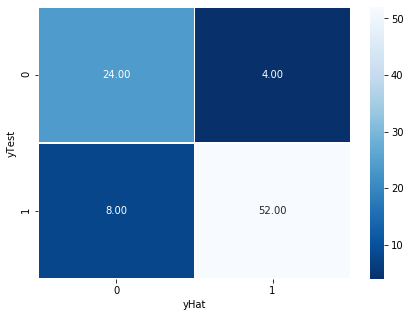

In [0]:
# Imprimir la matriz de confusión
matriz_confusion = metrics.confusion_matrix(y_test, y_hat_test)

# Graficar la matriz de Confusion
plt.figure(figsize=(7, 5))
plot_matriz = sns.heatmap(matriz_confusion, annot = True, fmt = '.2f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('yTest')
plt.xlabel('yHat')